In [1]:
import torch
torch.cuda.empty_cache()
import numpy as np
from PIL import Image
import matplotlib

from hr_dv2 import HighResDV2
from hr_dv2 import spectral
import hr_dv2.transform as tr
from hr_dv2.utils import *

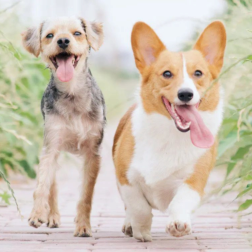

In [2]:
IMG_SIZE = 280 - 14 * 5
PATCH_SIZE  = 14
PATCH_H, PATCH_W = IMG_SIZE // PATCH_SIZE, IMG_SIZE // PATCH_SIZE
FEAT_DIM = 384

transform = tr.get_input_transform(IMG_SIZE, IMG_SIZE)

test_tensor, test_img = tr.load_image("data/d2.jpg", transform)
test_tensor = test_tensor.to('cuda')
test_img

In [3]:
net = HighResDV2("dinov2_vits14_reg", 4, dtype=torch.float32)
net.cuda()
net.eval()
pass

Using cache found in /home/ronan/.cache/torch/hub/facebookresearch_dinov2_main
/home/ronan/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/ronan/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/ronan/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


In [4]:
shift_dists = [i for i in range(1, 3)]
transforms, inv_transforms = tr.get_shift_transforms(shift_dists, 'Moore')
net.set_transforms(transforms, inv_transforms)
hy_features, lr_features = net.forward(test_tensor)

In [5]:
feat_arr_hr = tr.to_numpy(hy_features)
feat_arr_hr = feat_arr_hr.reshape((net.feat_dim, IMG_SIZE * IMG_SIZE))
feat_arr_hr = feat_arr_hr.T
#feat_arr_hr = feat_arr_hr.reshape((IMG_SIZE, IMG_SIZE, FEAT_DIM))
feat_arr_hr = feat_arr_hr.astype(np.float32)
feat_arr_hr.shape

(63504, 384)

In [6]:
img_arr = np.array(test_img) / 255
_, eigvecs = spectral.get_affinity_eigvectors(feat_arr_hr, img_arr)
#colour_affinity = spectral.knn_affinity(img_arr)
#colour_affinity.shape

Starting mat mul


: 